<a href="https://colab.research.google.com/github/mulkerrin-sean/awesome/blob/main/python-demo-google-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try PyGMT on Google Colab

This Jupyter Notebook shows how to install and use PyGMT on Google Colab.

**NOTE:** Any changes will be lost when the Jupyter lab is closed. Select "File"->"Download" to save notebooks to your computer.

To execute the code cells, select it and type `Shift + Enter` or click on the "Run" ► button in the menu bar.

For tutorials and more examples, visit the official website: https://www.pygmt.org

## Install PyGMT and its dependencies on Google Colab

**Google Colab** doesn't have PyGMT and its dependencies installed. We need to follow the instructions below to install them.

First, we need to install conda on Google Colab. The installation process is greatly simplified using the [condacolab](https://github.com/conda-incubator/condacolab) package.

*After condacolab finishes the installation, it will restart the Python kernel for changes to be applied. This happens automatically. Thus, you will see a message saying "Your session crashed for an unknown reason". You can safely ignore this message!*

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


Now we can install PyGMT and its dependencies using a single command. The installation may take a few minutes:

In [2]:
!mamba install pygmt


Looking for: ['pygmt']

[+] 0.0s
conda-forge/linux-64  ⣾  [+] 0.1s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   7%
conda-forge/noarch     5%[+] 0.3s
conda-forge/linux-64  13%
conda-forge/noarch    13%[+] 0.4s
conda-forge/linux-64  15%
conda-forge/noarch    28%[+] 0.5s
conda-forge/linux-64  22%
conda-forge/noarch    41%[+] 0.6s
conda-forge/linux-64  26%
conda-forge/noarch    51%[+] 0.7s
conda-forge/linux-64  29%
conda-forge/noarch    60%[+] 0.8s
conda-forge/linux-64  34%
conda-forge/noarch    63%[+] 0.9s
conda-forge/linux-64  38%
conda-forge/noarch    72%[+] 1.0s
conda-forge/linux-64  43%
conda-forge/noarch    82%[+] 1.1s
conda-forge/linux-64  46%
conda-forge/noarch    93%conda-forge/noarch                                
[+] 1.2s
conda-forge/linux-64  50%[+] 1.3s
conda-forge/linux-64  58%[+] 1.4s
conda-forge/linux-64  66%[+] 1.5s
conda-forge/linux-64  74%[+] 1.6s
conda-forge/linux-64  81%[+] 1.7s
conda-forge/linux-64  88%[+] 1.8s
conda-forge/linux

## Loading the PyGMT package

You can load PyGMT by importing the `pygmt` Python package. Most GMT processing modules will be avialable as functions in this package. The plotting modules are methods of the `pygmt.Figure` class.

In [1]:
# Load the PyGMT package. This only needs to be run once
import pygmt

## Check the installed environment

Before starting, let's first check the current environment:

In [2]:
pygmt.show_versions()

PyGMT information:
  version: v0.16.0
System information:
  python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.1.123+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.2
  pandas: 2.3.1
  xarray: 2025.7.1
  packaging: 24.2
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.10.1
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


## Example 1

All figure generation in PyGMT is handled by the `pygmt.Figure` class.
It has methods to add layers to your figure, like a basemap, coastlines, etc.

We start a new figure by creating an instance of `pygmt.Figure`:

In [3]:
fig = pygmt.Figure()

We add elements to the figure using its methods. For example, lets add the global coastlines to a 15 cm wide map using the Hammer projection (**H**).
Our figure will also have a nice frame with automatic ticks.

In [4]:
fig.coast(region='g', projection='H15c', frame=True, land='lightbrown', water='lightblue')

You can see a preview of the figure directly in the Jupyter notebook using `fig.show()`.

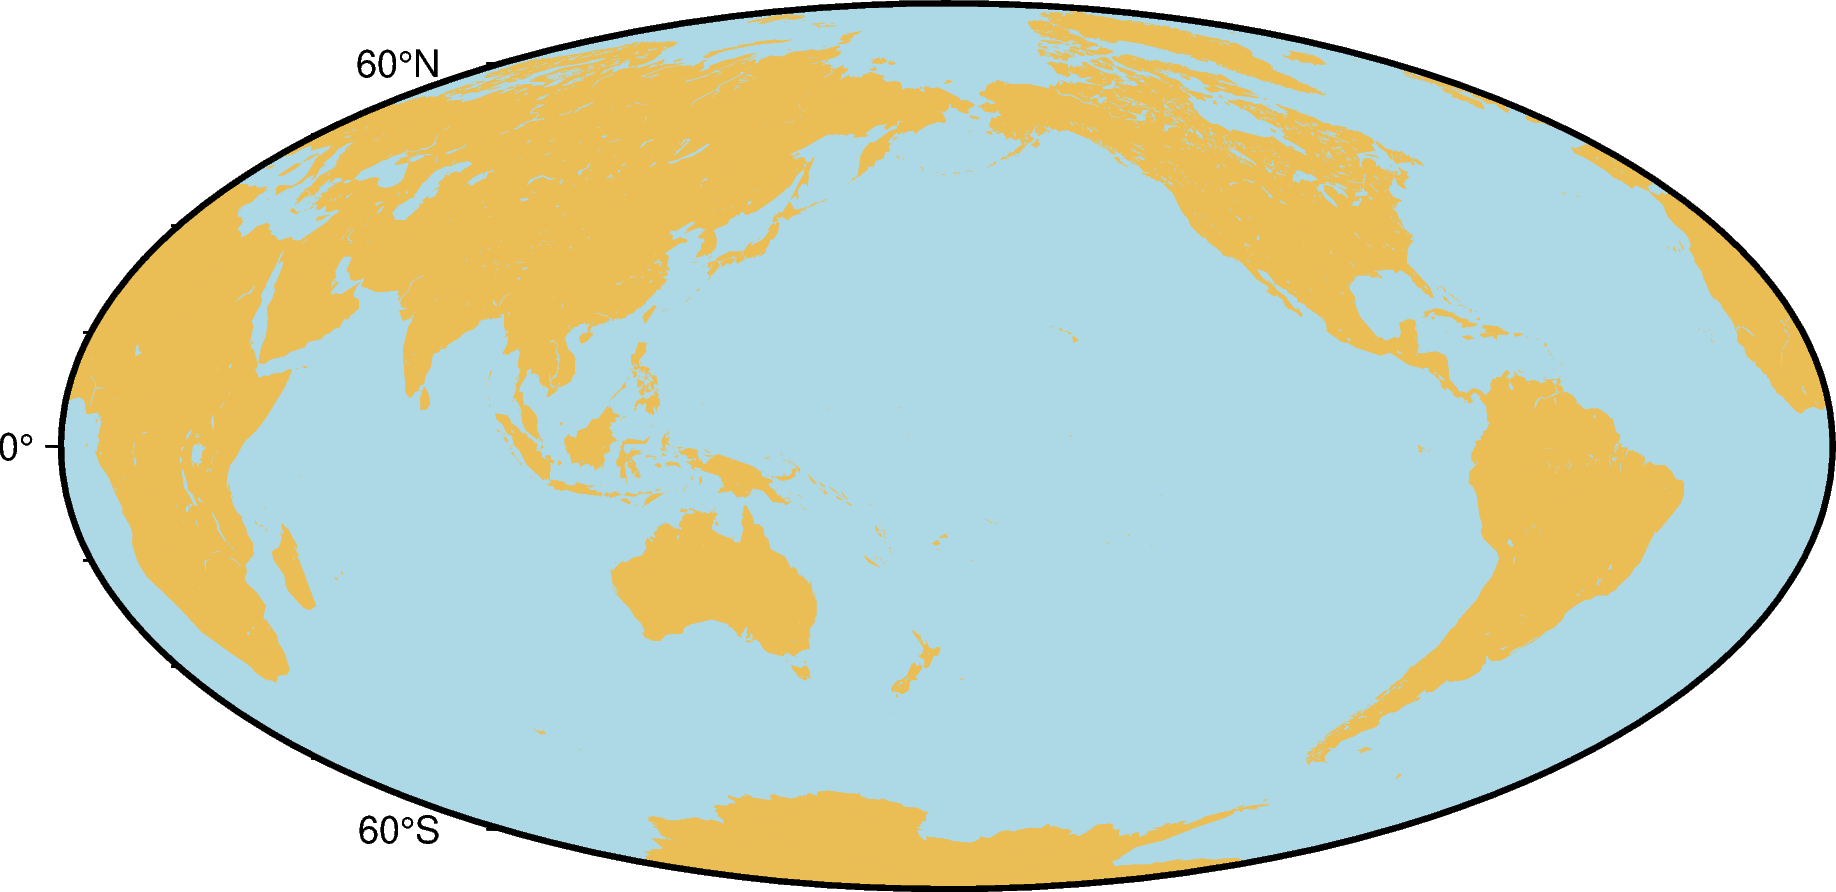

In [5]:
fig.show()

You can also save your figure in several graphics formats (e.g., png, pdf, jpg) using `fig.savefig()`:

In [6]:
fig.savefig("global.png")

## Example 2

gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


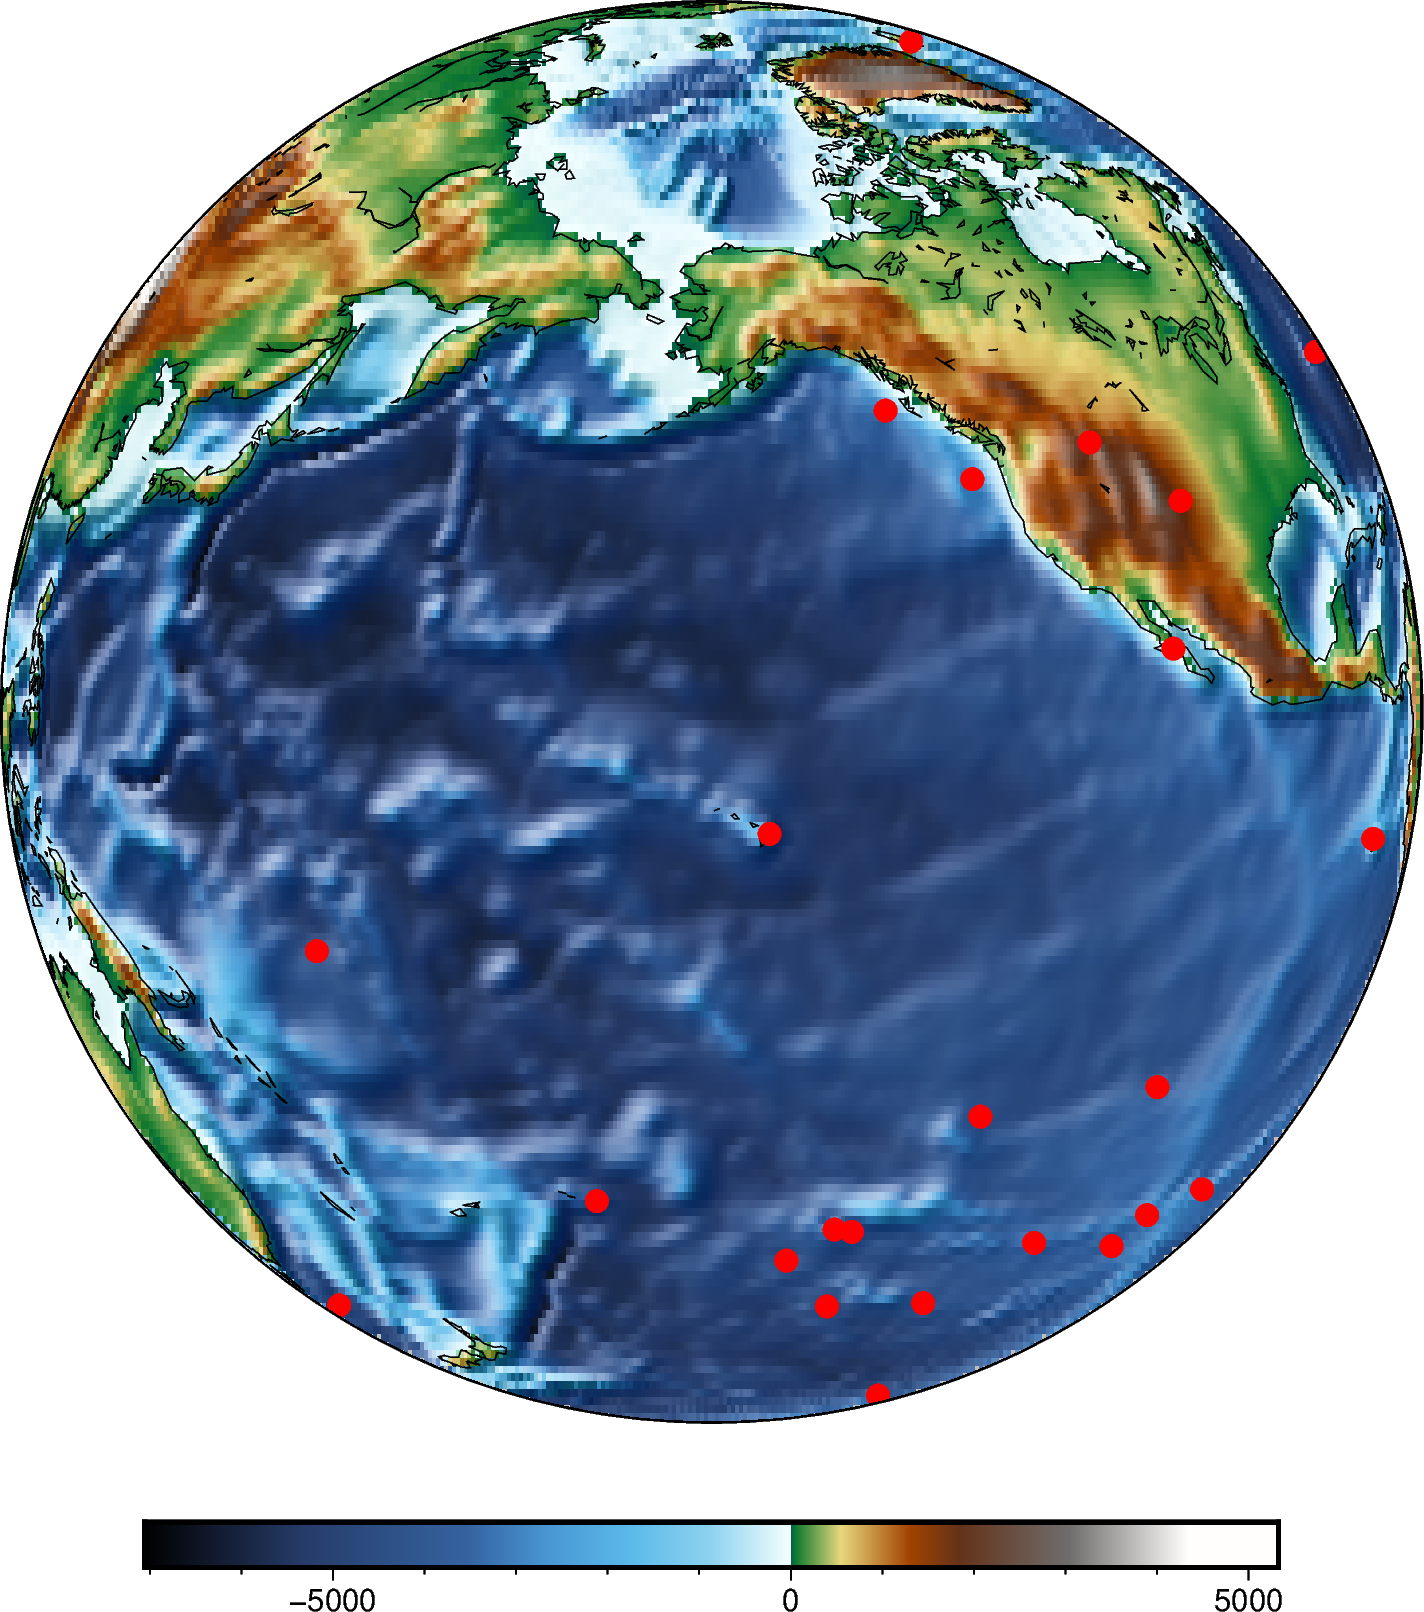

In [7]:
from pygmt.datasets import load_earth_relief

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G200/30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

## Experiment for yourself

Try running different things in the cells below or edit and rerun the cells above.

In [ ]:
fig = pygmt.Figure()
# Any Python codes here
fig.show()